# $H \rightarrow ZZ \rightarrow 4\ell \textrm{ vs. }ZZ \rightarrow 4\ell$ exercise 03
 >__Created__:  2018 Harrison B. Prosper



### Exercise
  1. Build deep network, using __MLPClassifier__, to discriminate between the Higgs boson production and di Z-boson production. Try variables $(m_{Z1}, m_{Z2})$, which in the dataframe are $Z1mass$ and $Z2mass$, respectively
  1. Try one and two hidden layers.
  1. Vary the number of nodes/layer

In [1]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# update fonts
FONTSIZE = 18
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

mp.rc('font', **font)

### Load Higgs boson data into memory


In [3]:
train_data, test_data = joblib.load('higgs_data.pkl')
train_data[['target','Z1mass', 'Z2mass', 'pt4l']][:20]

,target,Z1mass,Z2mass,pt4l
33634,0.0,92.49,94.62,197.70
46219,0.0,91.90,89.24,168.70
46910,0.0,89.49,94.41,69.63
1202,0.0,90.77,89.05,155.50
46396,1.0,89.20,33.24,94.80
14307,0.0,89.68,26.27,104.00
13192,0.0,90.85,87.10,157.60
10269,0.0,90.83,92.18,69.67
51045,1.0,62.81,48.89,188.80
29703,0.0,91.87,92.70,264.40


### Prepare data for training/testing

In [20]:
def standardize_data(train_data, test_data, 
                     inputs  = ['Z1mass', 
                                'Z2mass']):
    scaler  = StandardScaler()
    scaler.fit(train_data[inputs])
    
    X_train = scaler.transform(train_data[inputs])
    X_test  = scaler.transform(test_data[inputs])
    y_train = train_data['target']
    y_test  = test_data['target']

    return (X_train, X_test, y_train, y_test, scaler)

In [32]:
inputs = ['Z1mass', 'Z2mass']
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, inputs)
help(scaler)

Help on StandardScaler in module sklearn.preprocessing.data object:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feature do not more or less look like standard normally
 |  distributed data (e.g. Gaussian with 0 mean and unit variance).
 |  
 |  For instance many elements used in the objective function of
 |  a learning algorithm (such as the RBF kernel of Support Vector
 |  Machines or the L1 and L2 regularizers of linear models) assume that
 |  all features are centered around 0 a

### Plot training standardized data

In [22]:
def splitData(X, y, names, N=-1):
    # create an empty "table"
    ncols = len(names)
    s = '[],'*ncols
    s = '[%s]' % s[:-1]
    sig = eval(s)
    bkg = eval(s)
 
    for i in range(len(y)):
        if y.iloc[i]:
            bag = sig # this is a reference (not a copie!)
        else:
            bag = bkg
            
        for c in range(ncols):
            bag[c].append(X[i][c])

        if N < 0: continue
        if len(sig) < N: continue
        if len(bkg) < N: continue
        break
        
    # create dataframes
    columns = {}
    for name in names:
        columns[name] = []
    sigdf = pd.DataFrame(columns)
    bkgdf = pd.DataFrame(columns)
    for i, name in enumerate(names):
        sigdf[name] = sig[i]
        bkgdf[name] = bkg[i]
    return (bkgdf, sigdf)

def plotData(bkg, sig, xmin=-3, xmax=3.0, ymin=-1.5, ymax=1.5, ftsize=FONTSIZE):
    # set size of figure
    plt.figure(figsize=(8,8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'$m_{Z1}$', fontsize=ftsize)
    plt.ylabel(r'$m_{Z2}$', fontsize=ftsize)
    
    # choose color of points
    red = (1,0,0)
    blue= (0,0,1)
    plt.scatter(sig['Z1mass'], sig['Z2mass'], marker='o',
                s=50, c=blue, alpha=0.2, label=r'$H \rightarrow ZZ \rightarrow 4\ell$')
    pl.legend(loc='upper left', fontsize='small') # activate legend
    
    plt.scatter(bkg['Z1mass'], bkg['Z2mass'], marker='*',
                s=100, c=red,  alpha=0.2, label=r'$ZZ \rightarrow 4\ell$')
    pl.legend(loc='upper left', fontsize='small') # activate legend
    
    plt.savefig('03_nn_hzz_standardized.png')
    plt.show()

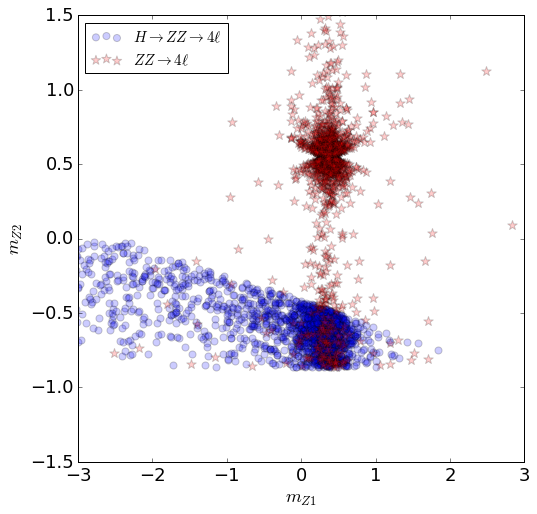

In [23]:
bkg, sig = splitData(X_train, y_train, inputs)
N = 2000
plotData(bkg[:N], sig[:N])

### Train classifier

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), 
                    max_iter=200, 
                    alpha=1e-3,
                    solver='adam', 
                    verbose=1, 
                    tol=1e-6, 
                    warm_start=False,
                    random_state=1)

print "*** TRAINING ***"
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))      
print("Test set score:     %f" % mlp.score(X_test,  y_test))

filename = '03_nn_higgs.pkl'
print "save to %s" % filename
joblib.dump([mlp, scaler], filename)

*** TRAINING ***
Iteration 1, loss = 0.48660559
Iteration 2, loss = 0.27431237
Iteration 3, loss = 0.20837359
Iteration 4, loss = 0.18932280
Iteration 5, loss = 0.18202060
Iteration 6, loss = 0.17806433
Iteration 7, loss = 0.17543663
Iteration 8, loss = 0.17353147
Iteration 9, loss = 0.17194484
Iteration 10, loss = 0.17036192
Iteration 11, loss = 0.16508589
Iteration 12, loss = 0.16026780
Iteration 13, loss = 0.15799218
Iteration 14, loss = 0.15589850
Iteration 15, loss = 0.15413983
Iteration 16, loss = 0.15270843
Iteration 17, loss = 0.15151746
Iteration 18, loss = 0.15036564
Iteration 19, loss = 0.14936906
Iteration 20, loss = 0.14844695
Iteration 21, loss = 0.14751631
Iteration 22, loss = 0.14664975
Iteration 23, loss = 0.14583756
Iteration 24, loss = 0.14520262
Iteration 25, loss = 0.14454641
Iteration 26, loss = 0.14381947
Iteration 27, loss = 0.14327600
Iteration 28, loss = 0.14268252
Iteration 29, loss = 0.14220694
Iteration 30, loss = 0.14174540
Iteration 31, loss = 0.14129861


['03_nn_higgs.pkl']

### Plot loss curve vs. epochs

In [25]:
def plotLoss(mlp, ftsize=FONTSIZE):
    y    = mlp.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.8*min(y)
    ymax = 1.2*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch', fontsize=ftsize)
    plt.ylabel(r'loss',  fontsize=ftsize)
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.savefig('02_nn_higgs_loss.png')
    plt.show()

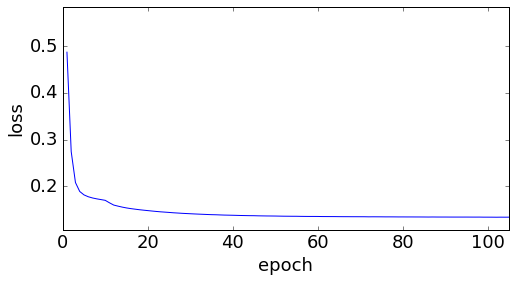

In [26]:
plotLoss(mlp)

In [27]:
print mlp.classes_

[ 0.  1.]


In [28]:
def plotDistribution(mlp, X_test, y_test, ftsize=FONTSIZE, fgsize=(16,8)):

    # returns (prob(class1), prob(class2))
    p = mlp.predict_proba(X_test)
        
    # set size of figure
    plt.figure(figsize=fgsize)
    
    # plot signals probs.
    plt.hist(p, 
             bins=200, 
             color=[(0,0,1), (1,0,0)], 
             range=(0.01,0.99), 
             normed=True, 
             label=[r'$ZZ \rightarrow 4\ell$', 
                    r'$H \rightarrow ZZ \rightarrow 4\ell$'])
    pl.legend(fontsize='small') # show legend using specified "label"
    
    # adjust y limits
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    delta = 0.2
    ii = int(1.3*ymax/delta)
    ymax = ii * 0.2
    axes.set_ylim((0, ymax))
    plt.savefig("03_nn_higgs_distribution.png")
    plt.show()

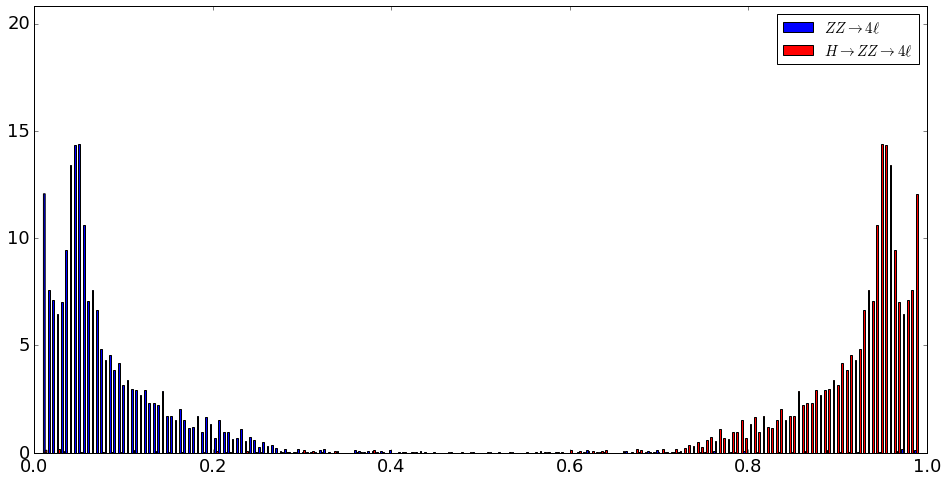

In [29]:
plotDistribution(mlp, X_test, y_test)

In [30]:
def plotResults(mlp, scaler, train_data, test_data, 
                xmin=0, xmax=140, ymin=0, ymax=140, N=2000,
                ftsize=FONTSIZE):
    
    # split into sig and bkg for the purposes of plotting
    select    = train_data['target'] == 1
    train_sig = train_data[select]
    select    = train_data['target'] == 0
    train_bkg = train_data[select]

    select    = test_data['target']  == 1
    test_sig  = test_data[select]
    select    = test_data['target']  == 0
    test_bkg  = test_data[select]
    
    # set size of figure
    plt.figure(figsize=(8,8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'$m_{Z1}$ (GeV)', fontsize=ftsize)
    plt.ylabel(r'$m_{Z2}$ (GeV)', fontsize=ftsize)
    
    # choose color of points
    red = (1,0,0)
    blue= (0,0,1)
    plt.scatter(test_sig['Z1mass'][:N], test_sig['Z2mass'][:N], marker='o',
                s=50, c=blue, alpha=0.2, label='sig')
    pl.legend() # activate legend
    
    plt.scatter(test_bkg['Z1mass'][:N], test_bkg['Z2mass'][:N], marker='*',
                s=100, c=red,  alpha=0.2, label='bkg')
    pl.legend() # activate legend
    
    # create a contour plot
    # 1. first create a mesh
    # 2. compute network output at all mesh points
    npoints= 50
    xdelta = float(xmax-xmin)/npoints
    ydelta = float(ymax-ymin)/npoints
    x = np.arange(xmin, xmax, xdelta)
    y = np.arange(ymin, ymax, ydelta)
    X, Y = np.meshgrid(x, y)
    
    # make grid points into a dataframe
    Z1mass = X.flatten()
    Z2mass = Y.flatten()
    XY  = pd.DataFrame({'Z1mass': Z1mass, 
                        'Z2mass': Z2mass})
    
    # apply standardization
    P = scaler.transform(XY)
    
    # compute network value at every grid point
    # and reshape to a npoints x npoints array
    Z = mlp.predict(P).reshape([len(X), len(X)])

    # plot contours
    mylevels = np.arange(0,1,0.01)
    plt.contour(X, Y, Z, levels=mylevels)
    plt.savefig('03_dnn_hzz_contours.png')
    plt.show()

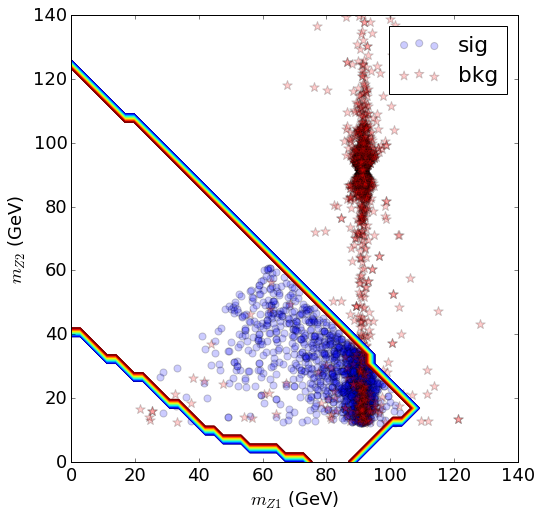

In [31]:
plotResults(mlp, scaler, train_data, test_data)